# Clasificación de digitos escritos a mano

## Código base para la resolución del Ejercicio Obligatorio de IA (Tema ML)

(c) Basado en el código inicial de Gabriel Moyà Alcover

In [1]:
# Librerias Python
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


** Exploración inicial del dataset **

In [2]:
# Cargamos el dataset y realizamos una exploración inicial de las muestras
digits = load_digits() 
print("* Nuestro conjunto de datos nos proporciona la siguiente información: ")
print(list(digits.keys()))
print("* Tenemos " , digits.data.shape[0], " imagenes, con ", digits.data.shape[1], " pixeles en cada una")

* Nuestro conjunto de datos nos proporciona la siguiente información: 
['data', 'target', 'target_names', 'images', 'DESCR']
* Tenemos  1797  imagenes, con  64  pixeles en cada una


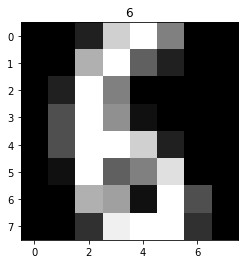

In [3]:
# Vamos a enseñar un número aleatorio de nuestro dataset.
# (Probar a ejecutar esta celda múltiples veces para ver diferentes números)

rnd = np.random.randint(0, digits.data.shape[0]) #generam un nombre aleatori dins el rang
numero = digits.target[rnd] # consultam la columna d'objectius

#Generación de la imagen
plt.figure()

image = digits.data[rnd,:] #cogemos una fila del conjunto y la transformamos en una matriz 8x8
fila_2_matrix = np.reshape(image, (8,8))

plt.imshow(fila_2_matrix, cmap=plt.cm.gray)
plt.title(numero)
plt.show()

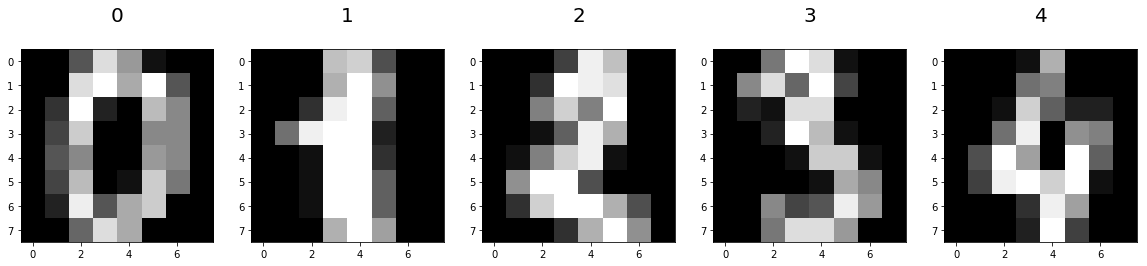

In [4]:
# Visualización de los diferentes ejemplos que podemos encontrar 
plt.figure(figsize=(20,4))
plt.clf()

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i\n' % label, fontsize = 20)
plt.show()

Vamos a descubrir cuantas muestras de cada número tenemos en nuestro conjunto de datos, así sabremos si el dataset está equilibrado

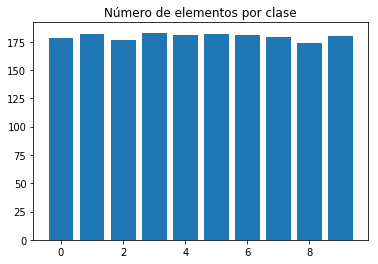

[178 182 177 183 181 182 181 179 174 180]


In [5]:
contadors = np.zeros(10, dtype = np.uint8)

for i in range(0,10):
    llista = digits.target[digits.target == i]
    contadors[i] = len(llista)

# Función ad-hoc  de la libreria Numyp
#unique, counts = np.unique(digits.target, return_counts=True)
#dict(zip(unique, counts))

plt.bar(range(10), contadors)
plt.title("Número de elementos por clase")
plt.show()
print(contadors)


### **Clasificación automática**

Para usar poder testear como bueno es nuestro clasificador dividimos nuestro conjunto de
datos con dos subconjuntos: ** entrenamiento y test. **  En este ejemplo se escoge un test set de 1/3 de los datos, esta ** eleccion ** debeis hacerla vosotros.

In [6]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=50)

print(x_train.shape)
print(x_test.shape)

# Comprobar que la suma de los dos subconjuntos es el número de muestras total

suma = x_train.shape[0] + x_test.shape[0]

print(suma == digits.data.shape[0])

(1203, 64)
(594, 64)
True


Aplicar el modelo seleccionado, recordar que probaremos ** tres modelos ** diferentes

[Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

[SVM](http://scikit-learn.org/stable/modules/svm.html)


## Análisis de los resultados

Emplear el módulo "metrics" para el análisis

http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Para analizar los resultados usaremos tres métricas diferentes:
    - Score
    - Classification_report
    - Matriz de confusión

In [48]:
# Ejemplo regresión logística

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
clf.predict(x_test[:2, :])
clf.predict_proba(x_test[:2, :])
y_outRL = clf.predict(x_test)
score = clf.score(x_test, y_test)
print(score)


0.9579124579124579


In [49]:
# Ejemplo Perceptron

from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)
y_outP = clf.predict(x_test)
score = clf.score(x_test, y_test)
print(score)


0.9276094276094277


In [50]:
# Ejemplo SVM

from sklearn import svm

svm = svm.LinearSVC()
svm.fit(x_train, y_train)
y_outSVM = svm.predict(x_test)
score = svm.score(x_test, y_test)
print(score)


0.9427609427609428


## Análisis de los resultados de Score

Como podemos observar, el modelo de regresión logística es el que nos da un valor de Score más alto,
seguido por el modelo SVM.


In [51]:
# Comparación de los resultados de classification_report

from sklearn.metrics import classification_report

print("tabla de classification report para el modelo de Regresión Logística:")
print("\n")
reportLR = classification_report(y_test,y_outRL)
print(reportLR)
print("\n")

print("tabla de classification report para el modelo de Perceptrón:")
print("\n")
reportP = classification_report(y_test,y_outP)
print(reportP)
print("\n")

print("tabla de classification report para el modelo de SVM:")
print("\n")
reportSVM = classification_report(y_test,y_outSVM)
print(reportSVM)

tabla de classification report para el modelo de Regresión Logística:


             precision    recall  f1-score   support

          0       1.00      0.97      0.99        71
          1       0.93      0.92      0.93        61
          2       0.98      1.00      0.99        61
          3       0.98      0.92      0.95        51
          4       0.95      0.97      0.96        59
          5       0.96      0.90      0.93        58
          6       0.98      1.00      0.99        60
          7       0.98      0.98      0.98        62
          8       0.91      0.92      0.92        53
          9       0.89      0.98      0.93        58

avg / total       0.96      0.96      0.96       594



tabla de classification report para el modelo de Perceptrón:


             precision    recall  f1-score   support

          0       0.99      0.99      0.99        71
          1       0.86      0.92      0.89        61
          2       0.95      0.98      0.97        61
          3

## Análisis de los resultados de Classification Report

Una vez analizadas las tablas, vemos que el modelo de regresión lineal sigue siendo el que nos da
un porcentaje de precisión más alto, seguido muy de cerca por el modelo SVM y finalmente el modelo
de perceptrón es el que nos da los valores más bajos.

In [52]:
# Comparación de los resultados de la matriz de confusión

from sklearn.metrics import confusion_matrix

print("matriz de confusión para el modelo de Regresión Logística:")
print("\n")
confusionLR = confusion_matrix(y_test,y_outRL)
print(confusionLR)
print("\n")

print("matriz de confusión para el modelo de Perceptrón:")
print("\n")
confusionP = confusion_matrix(y_test,y_outP)
print(confusionP)
print("\n")

print("matriz de confusión para el modelo de SVM:")
print("\n")
confusionSVM = confusion_matrix(y_test,y_outSVM)
print(confusionSVM)

matriz de confusión para el modelo de Regresión Logística:


[[69  0  0  0  1  0  1  0  0  0]
 [ 0 56  0  0  2  0  0  0  2  1]
 [ 0  0 61  0  0  0  0  0  0  0]
 [ 0  0  1 47  0  1  0  0  1  1]
 [ 0  1  0  0 57  0  0  1  0  0]
 [ 0  0  0  1  0 52  0  0  1  4]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  3  0  0  0  1  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  1 57]]


matriz de confusión para el modelo de Perceptrón:


[[70  0  0  0  0  1  0  0  0  0]
 [ 0 56  0  0  0  0  2  0  2  1]
 [ 0  1 60  0  0  0  0  0  0  0]
 [ 0  2  3 39  0  4  0  1  1  1]
 [ 0  1  0  0 54  0  3  1  0  0]
 [ 1  1  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  2  0 59  0  1]
 [ 0  3  0  0  0  2  1  0 47  0]
 [ 0  1  0  0  0  1  0  0  5 51]]


matriz de confusión para el modelo de SVM:


[[70  0  0  0  0  0  0  0  1  0]
 [ 0 51  0  0  1  0  0  0  8  1]
 [ 0  1 60  0  0  0  0  0  0  0]
 [ 1  0  0 45  0  0  0  2  3  0]
 [ 0  1  0  0 57  0  0  0  0  1]
 [ 0  0  0 

## Análisis de los resultados de la matriz de confusión

Para analizar estas matrices debemos fijarnos en los numeros que aparezcen en la diagonal, estos nos indican las veces que el modelo ha acertado analizando el numero, mientras que los valores dispersos, indican las veces que el modelo ha dado un resultado erroneo.

Comparando las tres matrices, vemos que el modelo de regresión lineal es el que más casos ha acertado, y por consiguiente el que menos valores tiene fuera de la diagonal. El modelo SVM es el segundo modelo que mejores resultados muestra en la matriz, y finalmente el modelo que mas veces se ha equivocado es el perceptrón.

## Conclusión

Tras comparar las tres metricas de cada modelo, vemos que en todos los casos el modelo de regresión lineal es el que mejor resultados da en los tres casos, por tanto es el que deberíamos aplicar como método de aprendizaje.

In [53]:
# Ejemplo de función sencilla para comparar y_out con y_test directamente

def medidas(y_actual, y_comp):
    positius = 0
    negatius = 0

    for i in range(len(y_comp)): 
        if y_actual[i]==y_comp[i]:
            positius += 1
        else:
            negatius += 1

    return positius, negatius



In [54]:
p, n = medidas(y_test, y_out)

ratio_ = p / len(y_test)
print("El nuestro ratio de aciertos es: ", ratio_ *  100, "%")

El nuestro ratio de aciertos es:  92.76094276094277 %


In [55]:
# Otra manera de hacerlo es con la matriz de confusión que nos da una visión más general de lo que está pasando.

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_out)

conf

array([[70,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  2,  0,  2,  1],
       [ 0,  1, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  3, 39,  0,  4,  0,  1,  1,  1],
       [ 0,  1,  0,  0, 54,  0,  3,  1,  0,  0],
       [ 1,  1,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 59,  0,  1],
       [ 0,  3,  0,  0,  0,  2,  1,  0, 47,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  5, 51]], dtype=int64)

![Caption for the picture.](https://i.stack.imgur.com/AuTKP.png)

** Nota: ** para el análisis puede ser interesante ver ejemplos de las malas clasificaciones de nuestro modelo

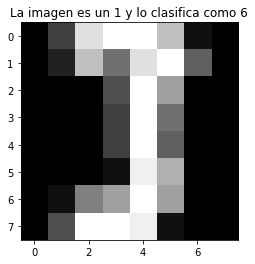

In [56]:
diferencias = np.where(y_test != y_out)
diferencias
plt.figure()

idx = diferencias[0][10]

image = digits.data[idx, :] #agafam una fila del dataset i la transformam en imatge
fila_2_matrix = np.reshape(image, (8,8))

plt.imshow(fila_2_matrix, cmap=plt.cm.gray)
plt.title("La imagen es un " + str(y_test[idx]) + " y lo clasifica como " + str(y_out[idx]))
plt.show()